<a href="https://colab.research.google.com/github/jodejetalo99/Computacion_Estadistica/blob/main/CE_Proyecto_StanR_JJTL_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Universidad Nacional Autónoma de México
# Instituto de Investigaciones en Matemáticas Aplicadas y en Sistemas
# Computación Estadística
# Profesor: Alan Riva Palacio Cohen
# Ayudante: Marco Antonio Gallegos Herrada
# Proyecto
# Alumno: José de Jesús Tapia López
# 14 de Junio de 2021



Como extra, vamos a ajustar el modelo de regresión logística usando STAN



In [ ]:
# Paquete con problemas para CmdStanR en colab
install.packages('pillar', version='1.6.0')
library(pillar)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Setup preliminar
install.packages('versions')
library(versions)
# Instala CmdStanR desde GitHub
library(devtools)
if(!require(cmdstanr)){
  devtools::install_github("stan-dev/cmdstanr", dependencies=c("Depends", "Imports"))
  library(cmdstanr)
}


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: usethis

Loading required package: cmdstanr

This is cmdstanr version 0.4.0.9000

- Online documentation and vignettes at mc-stan.org/cmdstanr

- Use set_cmdstan_path() to set the path to CmdStan

- Use install_cmdstan() to install CmdStan



In [ ]:
# Instala binaries de CmdStan
if (!file.exists("cmdstan-2.23.0.tar.gz")) {
  system("wget https://github.com/stan-dev/cmdstan/releases/download/v2.23.0/colab-cmdstan-2.23.0.tar.gz", intern=T)
  system("tar zxf colab-cmdstan-2.23.0.tar.gz", intern=T)
}
list.files("cmdstan-2.23.0")

character(0)

[1] "bin"                "examples"           "install-tbb.bat"   
 [4] "Jenkinsfile"        "lib"                "LICENSE"           
 [7] "make"               "makefile"           "README.md"         
[10] "runCmdStanTests.py" "src"                "stan"              
[13] "test-all.sh"

In [ ]:
# Fijar cmdstan_path para instalación de CmdStan
set_cmdstan_path("cmdstan-2.23.0")

CmdStan path set to: /content/cmdstan-2.23.0



In [ ]:
# Descargamos los datos
urlfile <- 'https://raw.githubusercontent.com/jodejetalo99/Computacion_Estadistica/main/Student-Pass-Fail-Data.csv'
datos <-read.csv(urlfile)

In [ ]:
# Visualizamos el dataframe (marco de los datos)
head(datos)

,Self_Study_Daily,Tution_Monthly,Pass_Or_Fail
,<int>,<int>,<int>
1,7,27,1
2,2,43,0
3,7,26,1
4,8,29,1
5,3,42,0
6,5,31,0


In [ ]:
# Número de datos (renglones)
N <- length(datos$Self_Study_Daily)
N

[1] 1000

In [ ]:
# variable explicativa (horas de estudio diarias)
x <-datos$Self_Study_Daily
x

[1]  7  2  7  8  3  5  1  7  8  4  4  8  5  3  8  3  1  3  6  5  7 10  2  3
  [25]  4  3  7  2  8  9  4  4  8  8  7  7  5  5  9  8  0  7  7  5  5  8  7  5
  [49]  8  8  3  2  8  8  6  6  7  3  7  2  7  7  7  2  7  7  2  7  4  4  8  7
  [73]  5  8  4  7  6  5  2  3  6  5  7  7  5  5  4  7  8  7  5  2  3  5  7  7
  [97]  6  7  3  8  9  6  8  7  8  5  7  4  4  3  2  3  8  5  8  9  8  3  6  7
 [121]  6  9  4  3  8  6  8  4  8  4  6  6  5  2  4  7  9  3  4  4  6  7  5  7
 [145]  9  6  3  6  8  6  8  7  8  7  7  7  7  3  4  8  7  5  4  4  7  6  7  4
 [169]  5  7  7  8  8  3  7  3  5  8  7  7  8  6  5  1  7  6  7  4  5  7  4  8
 [193]  3  5  7  5  7  4  7  8  4  7  5  3  4  6  2  6  5  7  8  5  5  8  3  8
 [217] 10  6  2  3  4  9  6  4  5  8  8  5  7  2  4  8  6  9  6  6  8  8  3  6
 [241]  9  4  7  8  2  6  6  8  6  7  5  8  8  7  8  5  5  6  7  8  6  3  8  7
 [265]  8  2  7  7  8  4  2  7  7  4  4  2  6  6  5  8  7  7  7  3  7  5  3  6
 [289]  7  3  7  6  1  7  3  8  3  4  7  5  7  4  5  8  7  4  7  8  7  7  4  5
 [313]  7  7  8  4  9  7  8  6  7  3  8  4  5  7  7  3  5  8  6  7  8  3  7  7
 [337]  8  6  5  8  7  8  3  8  6  7  9  3  2  5  5  7  4  8  9  6  9  7  4  3
 [361]  7  5  5  8  3  8  1  9  7  7  6  9  6  9  6  4  5  8  8  8  7  7  6  7
 [385]  8  6  8  2  8  4  5  5  5  7  6  9  8  3  2  7  7  8  4  5  7  7  6  5
 [409]  4  8  6  7  7 10  6  7  7  0  7  8  8  5  2  6  6  1  9  4  8  7  3  8
 [433]  3  2  9  4  9  4  8  2  1  8  6  7  7  4  5  4  8  8  8  3  1  7  5  7
 [457]  4  3  0  2  7  8  3  6  7  3  6  7  8  1  7  5  8  7  8  9  8  4  6  8
 [481]  4  8  3  3  7  3  6  7  5  7  6  2  5  6  5  8  9  7  3  5  6  6  4  8
 [505]  6  8  8  6  4  7  4  6  7  2  9  5  9  1  8  8  7  6  7  8  1  4  7  6
 [529]  4  4  7  3  6  7  8  4  7  3  6  8  7  3  4  4  5  6  4  5  7  4  7  7
 [553]  8  5  8  4  6  8  5  8  7  6  4  8  6  3  7  6  8  3  5  9  7  8  4  7
 [577]  8  7  7  5  4  2  3  9  8  3  4  6  7  7  3 10  4  4  3  6  5  4  2  7
 [601]  7  4  8  6  5  7  8  5  3  4  8  8  6  4  7  9  4  6  5  5  9  7  6  3
 [625]  1  7  2  8  5  5  3  4  8  6  5  9  4  2  8  6  6  6  9  6  9  7  5  8
 [649]  7  6  7  3  3  9  7  9  4  2  7  8  2  5  5  1  5  6  8  1  5  7  6  5
 [673]  2  6  4  5  7  4  7  6  2  5  4  8  7  5  8  2  9  5  6  6  8  7  6  3
 [697]  4  7  8  4  5  8  7  8  7  8  8  8  7  7  8  6  5  7  1  8  2  5  8  3
 [721]  8  7  7  7  3  7  7  7  5  6  6  5  9  6  7  2  7  5  3  6  7  6  3  1
 [745]  0  7  6  7  8  2  8  4  5  7  5  5  8  7  2  5  3  5  1  8  7  8  6  1
 [769]  2  5  7  6  6  4  2  4  4  8  7  7  4  3  9  8  5  4  7  7  7  3  4  6
 [793]  5  3  8  8  7  4  3  5  4  6  7  7  7  6  8  9  7  9  3  7 10  6  7  1
 [817]  0  1  7  7  8  3  3  4  8  7  5  5  8  8  7  5  5  1  7  7  3  8  7  4
 [841]  8  9  8  5  3  4  7  3  7  7  6  3  8  6  8  8  6  4  5  8  4  3  4  3
 [865]  6  5  5  3  4  7  8  3  4  3  7  6  8  3  5  8  9  7  2  7  8  9  2  2
 [889]  7  3  8  3  2  4  3  6  3  6  4  3  7  7  8  5  7  4  7  7  7  7  6  3
 [913]  3  4  9  8  1  9  3  8  4  4  1  8  2  7  7  7  1  6  6  4  7  8  8  7
 [937]  6  6  8  9  8  5  5  8  7  2  2  4  7  2  6  1  5  7  5  3  3  6  9  4
 [961]  8  8  4  6  7  8  5  9  8  8  7  4  4  7  5  8  5  8  7  8  7  5  7  3
 [985]  3  5  9  6  4  7  4  2  9  5  7  6  9  3  7  5

In [ ]:
# variable  respuesta (aprueba o reprueba)
y <- datos$Pass_Or_Fail
y

[1] 1 0 1 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0
  [38] 1 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1
  [75] 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0
 [112] 0 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0
 [149] 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1
 [186] 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0 1
 [223] 1 0 0 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 1
 [260] 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 0 1
 [297] 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1 1
 [334] 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 1
 [371] 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1
 [408] 0 0 1 0 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 1
 [445] 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 0 1 0
 [482] 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0
 [519] 1 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 1 0 1
 [556] 0 0 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 1 1 0 1
 [593] 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 1 0
 [630] 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0
 [667] 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 1 0 0 1 1
 [704] 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0
 [741] 1 1 0 0 0 1 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0
 [778] 1 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1
 [815] 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 0 1 1 1
 [852] 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 0 0
 [889] 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0
 [926] 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1
 [963] 0 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 1 1 0 1
[1000] 0

A continuación escribimos el modelo probabilístico en el lenguaje de Stan. Lo más destacable a mencionar es que el bloque de modelo es donde indicamos las distribuciones a prioris que deseamos incluir para nuestros parámetros. Si no se define ninguna a priori (que es justamente lo que hacemos en el primero de los dos modelos que crearemos en STAN), STAN usa las a prioris predeterminados con las especificaciones uniformes(-infinito, + infinito). También se pueden restringir las a prioris utilizando *upper* o *lower* al declarar los parámetros (es decir, lower = 0> para asegurarse de que un parámetro sea positivo). 

In [ ]:
# Escribimos el modelo probabilístico en el lenguaje de Stan
write("
// Modelo de Stan para regresión logística

data {

  int <lower = 1> N; // N es un entero (int) que denota el tamaño de muestra y es mayor o igual a 1
  vector[N] x; // Vector de covariables con longitud N
  int<lower=0,upper=1> y[N]; // Vector de variables de interés con longitud N
  
}

parameters {
  
  // Los parámetros del modelo (no observados) que queremos recuperar
  real beta_0; // Intercepto
  real beta_1; // Coeficiente de regresión
  
}

model {

  // Si no hay distribuciones a priori para beta_0 y/o beta_1 entonces se asignan distribuciones planas por default
  y ~ bernoulli_logit(beta_0 + beta_1 * x); // modelo de regresion logistica
}
"
, "stan_model_1.stan")

In [ ]:
# Función para imprimir el modelos de Stan
print_file <- function(file, nlines=-1L) {
  cat(paste(readLines(file, n=nlines), "\n", sep=""), sep="")
}

In [ ]:
# Comprobemos que egectivamente podemos acceder al modelo de Stan que guardamos
print_file("stan_model_1.stan")


// Modelo de Stan para regresión logística

data {

  int <lower = 1> N; // N es un entero (int) que denota el tamaño de muestra y es mayor o igual a 1
  vector[N] x; // Vector de covariables con longitud N
  int<lower=0,upper=1> y[N]; // Vector de variables de interés con longitud N
  
}

parameters {
  
  // Los parámetros del modelo (no observados) que queremos recuperar
  real beta_0; // Intercepto
  real beta_1; // Coeficiente de regresión
  
}

model {

  // Si no hay distribuciones a priori para beta_0 y/o beta_1 entonces se asignan distribuciones planas por default
  y ~ bernoulli_logit(beta_0 + beta_1 * x); // modelo de regresion logistica
}



In [ ]:
# Generamos lista con los datos para el modelo de Stan
stan_data <- list(N = N, x = x, y = y)

In [ ]:
# Cargamos el modelo de Stan
model_1 <- cmdstan_model(stan_file='stan_model_1.stan')

In [ ]:
# Realizamos el ajuste del modelo
model_1_fit <- model_1$sample(data=stan_data)

Running MCMC with 4 sequential chains...

Chain 1 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 1 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 1 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 1 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 1 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 1 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 1 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 1 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 1 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 1 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 1 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 1 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 1 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 1 Iteration: 1300 / 2000 [ 65%]  (Sampling) 
Chain 1 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 1 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 1 Iteration: 1600 / 2000 [ 80%]  (Sampling) 
Chain 1 Iteration: 1700 / 2000 [ 85%]  (Sampling) 
Chain 1 Ite

In [ ]:
# Resumen del modelo
model_1_fit$summary()

variable,mean,median,sd,mad,q5,q95,rhat,ess_bulk,ess_tail
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
lp__,-220.412123,-220.078500,1.0223919,0.7049763,-222.447300,-219.466000,1.004601,956.8385,873.8356
beta_0,-13.702437,-13.685950,0.9711509,0.9072029,-15.340590,-12.117240,1.009922,608.3592,661.6476
beta_1,2.253701,2.250895,0.1543862,0.1446647,1.998429,2.515097,1.009173,612.3300,655.3381


A partir de este resumen, podemos evaluar rápidamente la convergencia del modelo al observar los valores de Rhat para cada parámetro. Cuando están cerca de 1, las cadenas han convergido (aquí notamos que converge). Hay muchos otros diagnósticos, pero este es importante para STAN. 

Además, viendo los coeficientes estimados podemos notar que son muy parecidos a los que obteníamos con M-H (con la media y la mediana) y con MLE.

In [ ]:
# Arreglo con las simulaciones
draws_1  <- model_1_fit$draws()

In [ ]:
draws_1

# A draws_array: 1000 iterations, 4 chains, and 3 variables
, , variable = lp__

         chain
iteration    1    2    3    4
        1 -220 -221 -220 -220
        2 -220 -220 -219 -220
        3 -220 -220 -220 -220
        4 -220 -222 -220 -220
        5 -221 -222 -220 -220

, , variable = beta_0

         chain
iteration   1   2   3   4
        1 -14 -15 -15 -13
        2 -14 -13 -13 -13
        3 -14 -13 -13 -13
        4 -14 -16 -14 -13
        5 -14 -16 -14 -13

, , variable = beta_1

         chain
iteration   1   2   3   4
        1 2.2 2.5 2.4 2.1
        2 2.2 2.1 2.2 2.1
        3 2.3 2.1 2.2 2.1
        4 2.3 2.6 2.3 2.1
        5 2.3 2.6 2.4 2.1

# ... with 995 more iterations

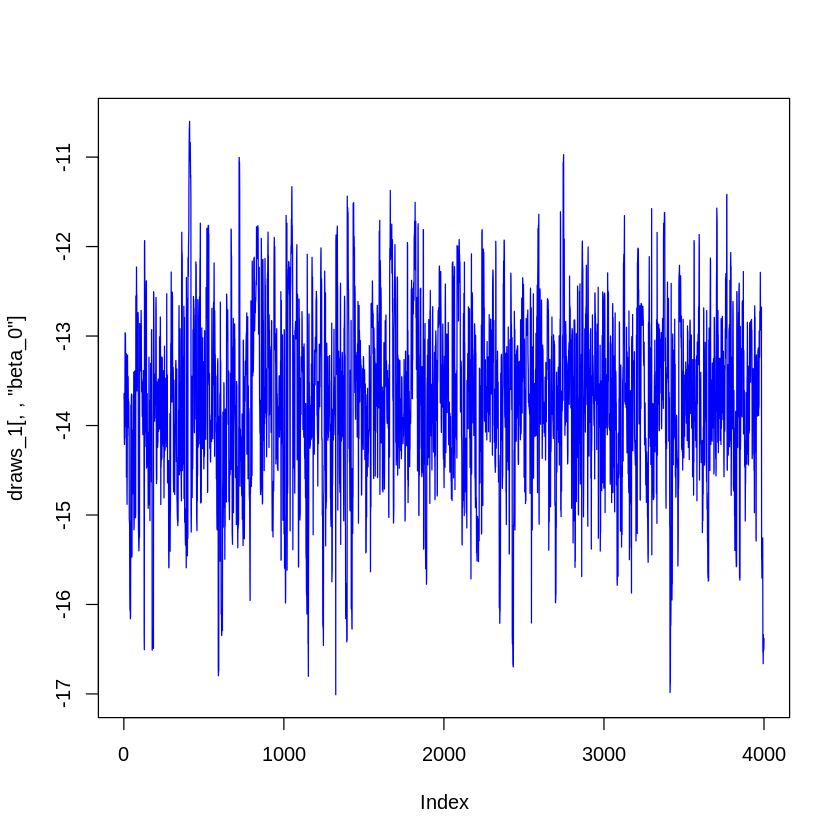

In [ ]:
# Cadena intercepto
plot( draws_1[,,'beta_0'], type = "l", col='blue')

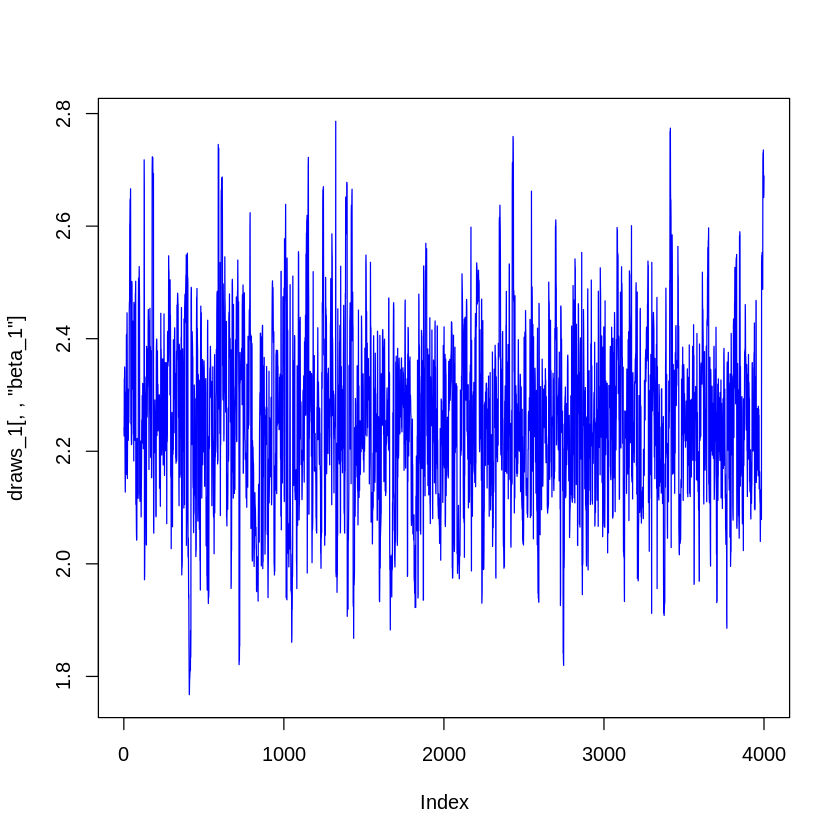

In [ ]:
# Cadena beta_1
plot( draws_1[,,'beta_1'], type = "l", col='blue')

De las dos gráficas anteriores podemos concluir un comportamiento adecuado de las cadenas.

Ahora haremos un modelo con distribuciones a priori que no sean planas; específicamente una $N(0,1)$ para $\beta_0$ y una $N(1,1)$ para $\beta_1$.

In [ ]:
# Escribimos el modelo probabilístico en el lenguaje de Stan
write("
// Modelo de Stan para regresión logística

data {

  int <lower = 1> N; // N es un entero (int) que denota el tamaño de muestra y es mayor o igual a 1
  vector[N] x; // Vector de covariables con longitud N
  int<lower=0,upper=1> y[N]; // Vector de variables de interés con longitud N
  
}

parameters {
  
  // Los parámetros del modelo (no observados) que queremos recuperar
  real beta_0; // Intercepto
  real beta_1; // Coeficiente de regresión
  
}

model {

  // Si no hay distribuciones a priori para beta_0 y/o beta_1 entonces se asignan distribuciones planas por default
  y ~ bernoulli_logit(beta_0 + beta_1 * x); // modelo de regresion logistica

  // a prioris no planas para los parametros no observados
  beta_0 ~ normal(0, 1);
  beta_1 ~ normal(1, 1);

}
"
, "stan_model_2.stan")

In [ ]:
# Cargamos el modelo de Stan
model_2 <- cmdstan_model(stan_file='stan_model_2.stan')

In [ ]:
# Realizamos el ajuste del modelo
model_2_fit <- model_2$sample(data=stan_data)

Running MCMC with 4 sequential chains...

Chain 1 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 1 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 1 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 1 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 1 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 1 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 1 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 1 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 1 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 1 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 1 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 1 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 1 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 1 Iteration: 1300 / 2000 [ 65%]  (Sampling) 
Chain 1 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 1 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 1 Iteration: 1600 / 2000 [ 80%]  (Sampling) 
Chain 1 Iteration: 1700 / 2000 [ 85%]  (Sampling) 
Chain 1 Ite

In [ ]:
# Resumen del modelo
model_2_fit$summary()

variable,mean,median,sd,mad,q5,q95,rhat,ess_bulk,ess_tail
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
lp__,-277.485260,-277.19900,0.92781555,0.67977210,-279.371100,-276.568000,1.001587,1216.1188,1633.8296
beta_0,-8.902704,-8.90135,0.48190137,0.49682667,-9.681263,-8.103288,1.003933,632.0502,803.1883
beta_1,1.497505,1.49753,0.07734615,0.07976388,1.370247,1.622227,1.003803,642.0443,847.3922


Vemos que los coeficientes estimados cambian más con dichas a prioris, por lo  que estos últimos los usaremos para las predicciones (lo hacemos en el primer notebook como ahí lo mencionamos) y calcularemos el accuracy usando este modelo, para ver si es que es mejor (o peor) que los demás.

Además, con este modelo también las cadenas han convergido, pues el rhat es cercano a 1.

In [ ]:
# Arreglo con las simulaciones del segundo modelo
draws_2  <- model_2_fit$draws()
draws_2

# A draws_array: 1000 iterations, 4 chains, and 3 variables
, , variable = lp__

         chain
iteration    1    2    3    4
        1 -278 -277 -278 -277
        2 -277 -277 -280 -277
        3 -277 -277 -277 -277
        4 -277 -277 -278 -277
        5 -277 -278 -277 -278

, , variable = beta_0

         chain
iteration    1    2    3    4
        1 -8.5 -8.6 -8.1 -8.5
        2 -8.8 -9.2 -8.1 -8.4
        3 -8.8 -9.3 -8.2 -9.3
        4 -8.9 -9.2 -8.2 -9.1
        5 -9.1 -9.6 -8.6 -9.3

, , variable = beta_1

         chain
iteration   1   2   3   4
        1 1.4 1.5 1.4 1.4
        2 1.5 1.6 1.4 1.4
        3 1.5 1.6 1.4 1.6
        4 1.5 1.6 1.4 1.5
        5 1.5 1.6 1.4 1.5

# ... with 995 more iterations

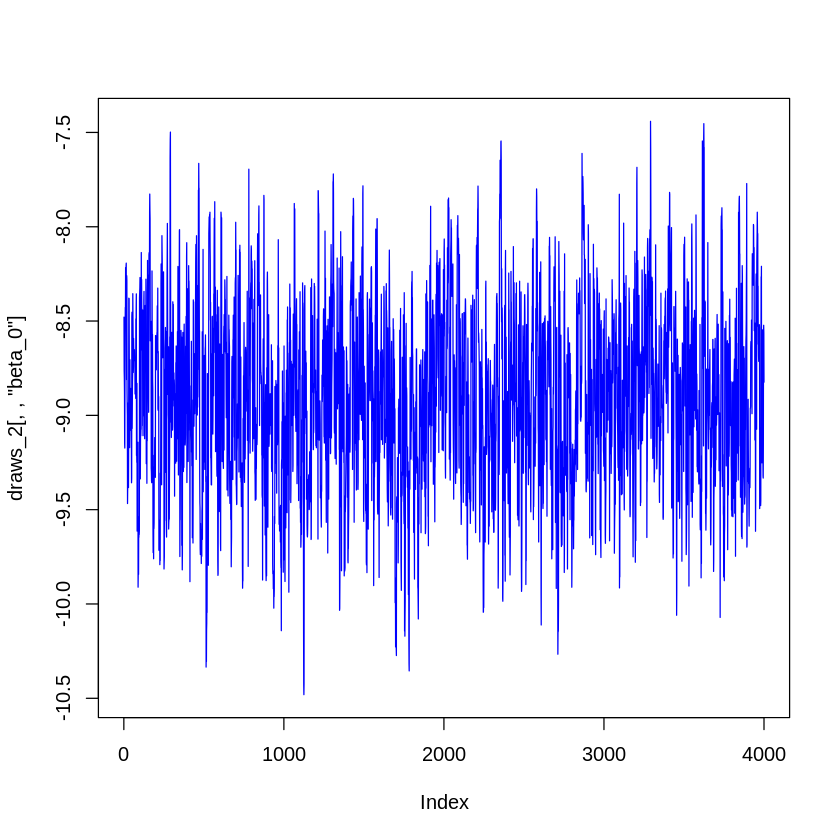

In [ ]:
# Cadena intercepto
plot( draws_2[,,'beta_0'], type = "l", col='blue')

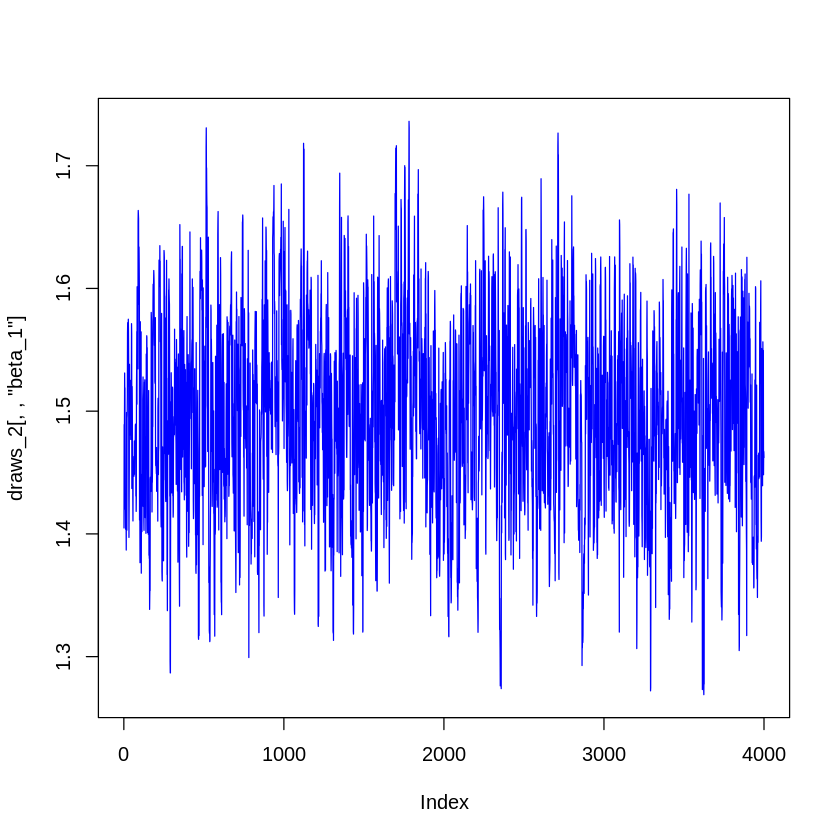

In [ ]:
# Cadena beta_1
plot( draws_2[,,'beta_1'], type = "l", col='blue')

De igual manera, con este modelo vemos un comportamiento adecuado de las cadenas.